In [1]:
import numpy as np
import pandas as pd
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
centres = [[-1., 0.], [1., -0.5], [0., 1.]]

In [3]:
import sklearn.datasets as skdat
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

xy, nclust = skdat.make_blobs(1000, centers=centres, cluster_std=0.3)

In [4]:
x = xy[:,0] # extract x and y vectors
y = xy[:,1]

centres_arr = np.array(centres)  # Convert centres to a numpy array
xcent = centres_arr[:, 0]
ycent = centres_arr[:, 1]

print(xcent)
print(ycent)

[-1.  1.  0.]
[ 0.  -0.5  1. ]


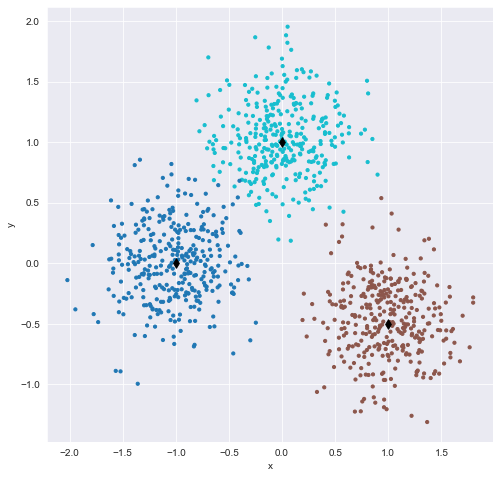

In [5]:
# cluster by cluster
plt.figure(figsize=(8.0, 8.0))
cm = plt.cm.get_cmap('tab10')
plt.scatter(x, y, 10, nclust, marker="o", cmap=cm)
plt.scatter(xcent, ycent, 45, "k", marker="d")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

[[-0.00166973  1.02412528]
 [ 0.98780069 -0.46999912]
 [-1.02185805 -0.00588685]]
0.6359959116897239


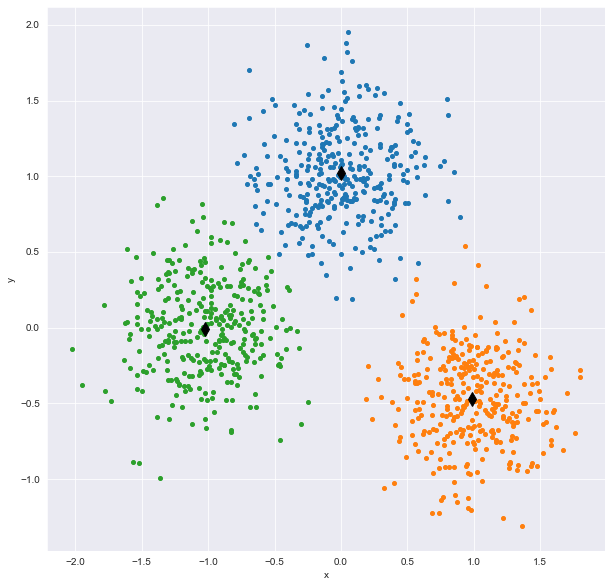

In [6]:
# from sklearn import cluster
import sklearn.cluster as cluster
import sklearn.metrics as skmet
ncluster = 3

kmeans = cluster.KMeans(n_clusters=ncluster)

kmeans.fit(xy) 
labels = kmeans.labels_

cen = kmeans.cluster_centers_
print(cen)

print(skmet.silhouette_score(xy, labels))

plt.figure(figsize=(10.0, 10.0))
col = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]
for l in range(ncluster):
    plt.plot(x[labels==l], y[labels==l], "o", markersize=4, color=col[l])

for ic in range(ncluster):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [7]:
print(kmeans.predict([[0.5, 0.5]]))

ncluster = 3
# set up the clusterer with the number of expected clusters
kmeans = cluster.KMeans(n_clusters=ncluster)
# Fit the data, results are stored in the kmeans object
kmeans.fit(xy) # fit done on x,y pairs
labels = kmeans.labels_
# extract the estimated cluster centres
cen = kmeans.cluster_centers_
# calculate the silhoutte score
print(skmet.silhouette_score(xy, labels))

[0]
0.6359959116897239


In [10]:
df = pd.read_csv('E:\MS Documents\Poster/green_house_gas_Emission.csv')

In [11]:
df.head()

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,807000.0,811069.99770,816600.00320,828610.01130,849479.98940,875579.98790,892349.98220,917560.01690,956139.99270,...,1.306100e+06,1.308610e+06,1.318920e+06,1.342550e+06,1.370950e+06,1.369670e+06,1.385480e+06,1.401180e+06,1.407690e+06,1.427180e+06
2,Afghanistan,11970.0,12199.99981,11420.00008,11500.00000,11539.99996,11970.00027,13000.00000,13970.00027,14789.99996,...,2.712000e+04,2.941000e+04,2.880000e+04,2.702000e+04,2.676000e+04,2.709000e+04,2.689000e+04,2.653000e+04,2.769000e+04,2.864000e+04
3,Africa Western and Central,398320.0,434809.99940,456619.99490,457090.00280,513829.99320,523890.00520,551809.98850,552220.00630,549469.99570,...,6.574900e+05,6.781500e+05,6.913500e+05,7.188400e+05,7.383800e+05,7.483500e+05,7.819400e+05,7.907700e+05,8.127800e+05,8.338400e+05
4,Angola,43150.0,43580.00183,44290.00092,47270.00046,50159.99985,53319.99969,54669.99817,55459.99908,59689.99863,...,7.773000e+04,7.915000e+04,7.740000e+04,8.109000e+04,8.239000e+04,8.736000e+04,8.591000e+04,8.101000e+04,7.524000e+04,7.968000e+04


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   1990          238 non-null    float64
 2   1991          239 non-null    float64
 3   1992          239 non-null    float64
 4   1993          239 non-null    float64
 5   1994          239 non-null    float64
 6   1995          239 non-null    float64
 7   1996          239 non-null    float64
 8   1997          239 non-null    float64
 9   1998          239 non-null    float64
 10  1999          239 non-null    float64
 11  2000          239 non-null    float64
 12  2001          239 non-null    float64
 13  2002          239 non-null    float64
 14  2003          239 non-null    float64
 15  2004          239 non-null    float64
 16  2005          239 non-null    float64
 17  2006          239 non-null    float64
 18  2007          239 non-null    

In [13]:
centres = [[-1., 0.], [1., -0.5], [0., 1.]]


In [14]:
import sklearn.datasets as skdat
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

xy, nclust = skdat.make_blobs(1000, centers=centres, cluster_std=0.3)


In [15]:
for i in range(20):
  print(xy[i], nclust[i])

[-0.90514702  0.12713642] 0
[ 0.60689349 -0.66661035] 1
[-0.86957899  0.55127756] 0
[ 1.05871345 -0.60794872] 1
[-1.29576173 -0.48406631] 0
[-0.73488632  0.01837348] 0
[ 1.08879757 -0.573278  ] 1
[ 0.95660435 -0.39147663] 1
[ 1.09475022 -0.29152157] 1
[-0.79669437 -0.39711716] 0
[0.08959127 0.93471567] 2
[0.63851559 0.84893003] 2
[ 1.02289665 -0.77822248] 1
[ 0.9006374  -0.35996652] 1
[-1.06842082  0.31797141] 0
[0.12577302 1.171488  ] 2
[ 0.9928981 -0.3570228] 1
[ 1.7507323  -0.03026144] 1
[ 0.99562773 -0.79718949] 1
[-0.74725844 -0.6002934 ] 0


In [16]:
x = xy[:,0] # extract x and y vectors
y = xy[:,1]

centres_arr = np.array(centres)  # Convert centres to a numpy array
xcent = centres_arr[:, 0]
ycent = centres_arr[:, 1]

print(xcent)
print(ycent)

[-1.  1.  0.]
[ 0.  -0.5  1. ]


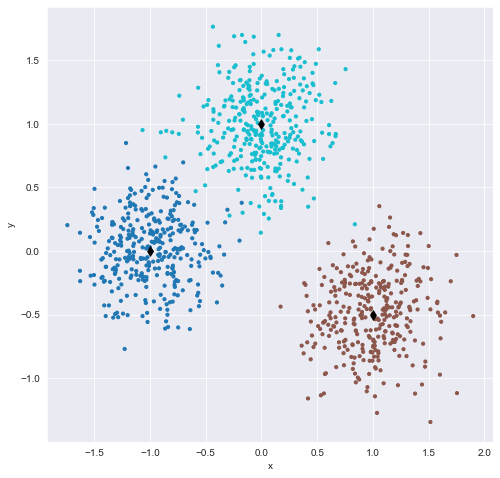

In [17]:
# cluster by cluster
plt.figure(figsize=(8.0, 8.0))
cm = plt.cm.get_cmap('tab10')
plt.scatter(x, y, 10, nclust, marker="o", cmap=cm)
plt.scatter(xcent, ycent, 45, "k", marker="d")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


[[ 0.99564312 -0.47936367]
 [-0.99349618  0.02641634]
 [ 0.01028147  0.99523938]]
0.6533807228517556


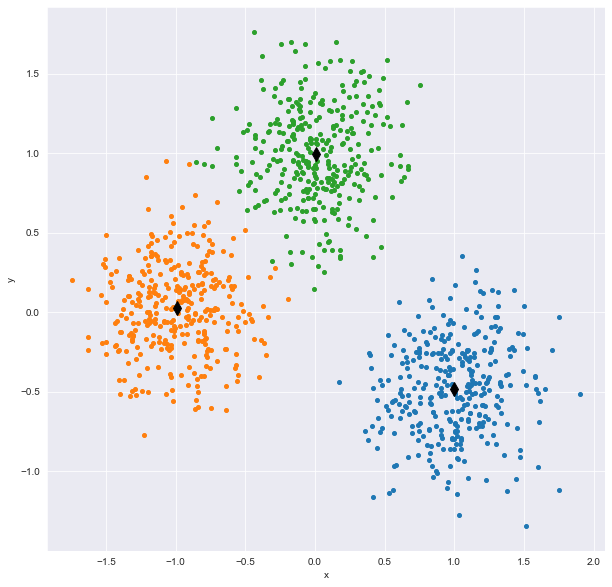

In [46]:
# from sklearn import cluster
import sklearn.cluster as cluster
import sklearn.metrics as skmet
ncluster = 3
# set up the clusterer with the number of expected clusters
kmeans = cluster.KMeans(n_clusters=ncluster)
# Fit the data, results are stored in the kmeans object
kmeans.fit(xy) # fit done on x,y pairs
labels = kmeans.labels_
# print(labels) # labels is the number of the associated clusters of (x,y)␣
# for i in range(50):
# print(xy[i], labels[i])
# extract the estimated cluster centres
cen = kmeans.cluster_centers_
print(cen)
# calculate the silhoutte score
print(skmet.silhouette_score(xy, labels))
# plot using the labels to select colour
plt.figure(figsize=(10.0, 10.0))
col = ["tab:blue", "tab:orange", "tab:green", "tab:yellow", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]
for l in range(ncluster): # loop over the different labels
    plt.plot(x[labels==l], y[labels==l], "o", markersize=4, color=col[l])
# show cluster centres
for ic in range(ncluster):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [19]:
print(kmeans.predict([[0.5, 0.5]]))

[2]


In [20]:

ncluster = 3
# set up the clusterer with the number of expected clusters
kmeans = cluster.KMeans(n_clusters=ncluster)
# Fit the data, results are stored in the kmeans object
kmeans.fit(xy) # fit done on x,y pairs
labels = kmeans.labels_
# extract the estimated cluster centres
cen = kmeans.cluster_centers_
# calculate the silhoutte score
print(skmet.silhouette_score(xy, labels))


0.6533807228517556


In [21]:
print(df.describe())

               1990          1991          1992          1993          1994  \
count  2.380000e+02  2.390000e+02  2.390000e+02  2.390000e+02  2.390000e+02   
mean   1.122091e+06  1.123956e+06  1.122477e+06  1.127441e+06  1.136135e+06   
std    3.373954e+06  3.382109e+06  3.372343e+06  3.384065e+06  3.401402e+06   
min    1.000000e+01  1.000000e+01  2.000000e+01  2.000000e+01  2.000000e+01   
25%    8.437500e+03  8.770000e+03  9.055000e+03  9.270000e+03  8.845000e+03   
50%    4.149000e+04  4.011000e+04  3.922000e+04  4.085000e+04  4.237000e+04   
75%    3.816550e+05  3.860700e+05  3.914950e+05  3.957900e+05  4.094250e+05   
max    2.943468e+07  2.958382e+07  2.958375e+07  2.973365e+07  2.999725e+07   

               1995          1996          1997          1998          1999  \
count  2.390000e+02  2.390000e+02  2.390000e+02  2.390000e+02  2.390000e+02   
mean   1.167425e+06  1.186288e+06  1.197101e+06  1.206709e+06  1.211528e+06   
std    3.494534e+06  3.548941e+06  3.580317e+06  3.

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [23]:
X= df.iloc[: , 1: :]
X

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,807000.0,811069.99770,816600.00320,828610.01130,849479.98940,875579.98790,892349.98220,917560.01690,956139.99270,942640.00240,...,1.306100e+06,1.308610e+06,1.318920e+06,1.342550e+06,1.370950e+06,1.369670e+06,1.385480e+06,1.401180e+06,1.407690e+06,1.427180e+06
2,11970.0,12199.99981,11420.00008,11500.00000,11539.99996,11970.00027,13000.00000,13970.00027,14789.99996,15670.00008,...,2.712000e+04,2.941000e+04,2.880000e+04,2.702000e+04,2.676000e+04,2.709000e+04,2.689000e+04,2.653000e+04,2.769000e+04,2.864000e+04
3,398320.0,434809.99940,456619.99490,457090.00280,513829.99320,523890.00520,551809.98850,552220.00630,549469.99570,545489.99740,...,6.574900e+05,6.781500e+05,6.913500e+05,7.188400e+05,7.383800e+05,7.483500e+05,7.819400e+05,7.907700e+05,8.127800e+05,8.338400e+05
4,43150.0,43580.00183,44290.00092,47270.00046,50159.99985,53319.99969,54669.99817,55459.99908,59689.99863,58639.99939,...,7.773000e+04,7.915000e+04,7.740000e+04,8.109000e+04,8.239000e+04,8.736000e+04,8.591000e+04,8.101000e+04,7.524000e+04,7.968000e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,17800.0,19549.99924,20110.00061,21450.00076,26309.99947,27479.99954,28129.99916,29899.99962,31159.99985,33889.99939,...,5.217000e+04,4.894000e+04,4.450000e+04,5.409000e+04,5.232000e+04,2.946000e+04,2.390000e+04,2.384000e+04,2.386000e+04,2.526000e+04
263,331660.0,327750.00000,323970.00120,334540.00850,341459.99150,354339.99630,364609.98540,381040.00850,388529.99880,369000.00000,...,5.341200e+05,5.183400e+05,5.385500e+05,5.483500e+05,5.608600e+05,5.361200e+05,5.361900e+05,5.507000e+05,5.496500e+05,5.554300e+05
264,27460.0,27819.99969,27979.99954,27530.00069,26809.99947,26590.00015,24719.99931,25510.00023,27229.99954,25510.00023,...,3.120000e+04,3.089000e+04,3.456000e+04,3.536000e+04,3.542000e+04,3.631000e+04,3.639000e+04,3.670000e+04,3.756000e+04,3.757000e+04


In [35]:
#df = df.drop([], axis=1)
#print(df.describe())

               1990          2000          2013          2014          2015  \
count  2.550000e+02  2.550000e+02  2.550000e+02  2.550000e+02  2.550000e+02   
mean   1.383839e+06  1.684939e+06  1.648509e+06  1.645720e+06  1.642930e+06   
std    3.989906e+06  5.095846e+06  5.002817e+06  4.996278e+06  4.989752e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.967000e+02  3.508650e+03  3.745310e+03  3.732800e+03  3.724150e+03   
50%    3.327000e+04  3.838140e+04  3.640520e+04  3.613160e+04  3.585800e+04   
75%    2.729455e+05  3.118058e+05  2.878050e+05  2.865950e+05  2.853850e+05   
max    3.358906e+07  4.145927e+07  4.083866e+07  4.079379e+07  4.074891e+07   

               2016          2017          2018          2019          2020  
count  2.550000e+02  2.550000e+02  2.550000e+02  2.550000e+02  2.550000e+02  
mean   1.640667e+06  1.637121e+06  1.634391e+06  1.631537e+06  1.628757e+06  
std    4.984980e+06  4.976272e+06  4.970259e+06  4.963

In [24]:
df[X.columns] = scaler.fit_transform(df[X.columns])

In [28]:
df_green = df[['1990', '2000', '2010', '2015', '2019']]
print(df_green.describe())

             1990        2000        2010        2015        2019
count  238.000000  239.000000  239.000000  239.000000  239.000000
mean     0.038121    0.037878    0.039761    0.040258    0.040715
std      0.114625    0.113145    0.120793    0.123469    0.125510
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.000286    0.000296    0.000290    0.000275    0.000264
50%      0.001409    0.001404    0.001407    0.001224    0.001188
75%      0.012966    0.013403    0.012187    0.010474    0.010138
max      1.000000    1.000000    1.000000    1.000000    1.000000


In [29]:
!pip install cluster_tools

In [30]:
import cluster_tools as ct
corr = df_green.corr()
print(corr)

          1990      2000      2010      2015      2019
1990  1.000000  0.994675  0.965507  0.950840  0.941662
2000  0.994675  1.000000  0.978944  0.966803  0.958492
2010  0.965507  0.978944  1.000000  0.998524  0.996275
2015  0.950840  0.966803  0.998524  1.000000  0.999443
2019  0.941662  0.958492  0.996275  0.999443  1.000000


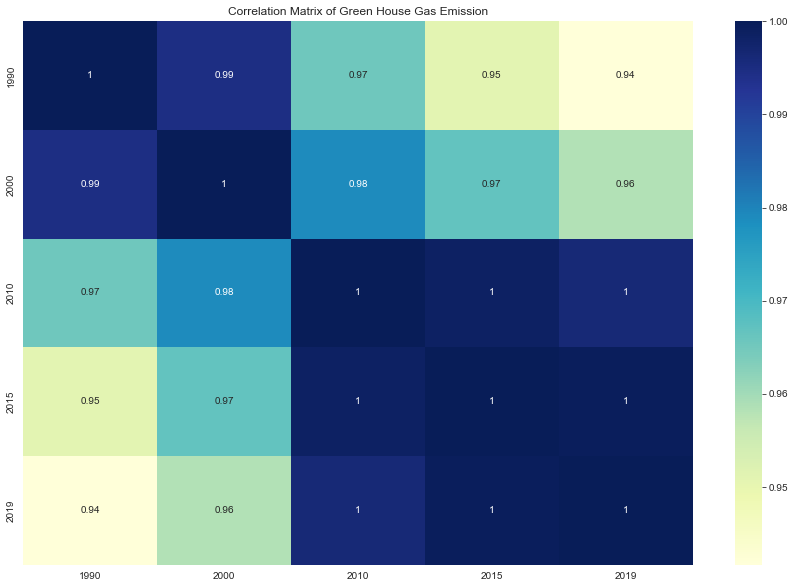

In [32]:
plt.figure(figsize=(15, 10))
corr = corr.fillna(0)
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix of Green House Gas Emission")
plt.show()

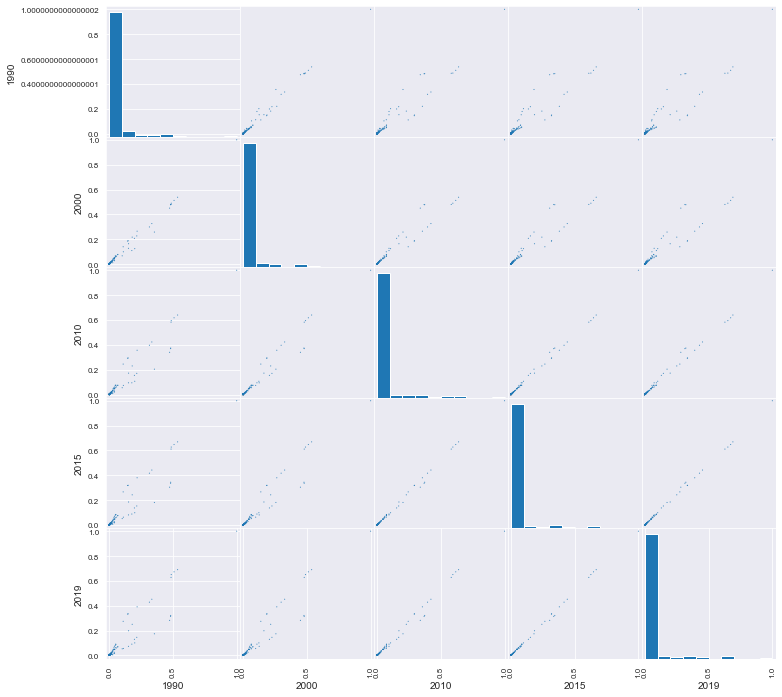

In [34]:
pd.plotting.scatter_matrix(df_green, figsize=(12, 12), s=5, alpha=0.8)
plt.show()